In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
credits=pd.read_csv('../dataset/tmdb_5000_credits.csv')
movies=pd.read_csv('../dataset/tmdb_5000_movies.csv')

# Data Cleaning: 
1. Credits Dataset:
   - The **Cast and Crew feature** is a list that has a dictionary with key-value pair of the numerous characters and crew members respectively in the movie. Since it consists of a lot of characters we can only use the top 5 characters and only the director's name from the crew member since they are the one popularly recognized by audience. (Tideness)
3. Movies Dataset:
   - **Home Page**: 64% of the values are missing (Completeness)
   - **Tagline**: 17% of the values are missing (Completeness)
   - The **Genres, Keywords, Production_companines, Production_countries** is also inside a list with key-value pairs (Tideness)

In [3]:
print(f'The shape of the credits dataset is {credits.shape}')
print(f'The shape of the movies dataset is {movies.shape}')

The shape of the credits dataset is (4803, 4)
The shape of the movies dataset is (4803, 20)


In [4]:
credits.sample(5)

,movie_id,title,cast,crew
4059,31163,Chicken Tikka Masala,"[{""cast_id"": 1, ""character"": ""Jimi Chopra"", ""c...","[{""credit_id"": ""52fe44659251416c9100f28d"", ""de..."
1317,10534,White Squall,"[{""cast_id"": 1, ""character"": ""Captain Christop...","[{""credit_id"": ""52fe43829251416c7501325d"", ""de..."
1833,10327,"Legally Blonde 2: Red, White & Blonde","[{""cast_id"": 8, ""character"": ""Elle Woods"", ""cr...","[{""credit_id"": ""52fe435a9251416c7500d081"", ""de..."
3542,193722,R100,"[{""cast_id"": 2, ""character"": ""Takafumi Katayam...","[{""credit_id"": ""52fe4cd69251416c91101cd5"", ""de..."
2519,22556,The Yellow Handkerchief,"[{""cast_id"": 5, ""character"": ""Brett Hanson"", ""...","[{""credit_id"": ""52fe4445c3a368484e019b05"", ""de..."


In [5]:
movies.sample(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2981,10000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,10314,"[{""id"": 4656, ""name"": ""tv star""}, {""id"": 5135,...",en,She's All That,High school hotshot Zach Siler is the envy of ...,8.987600,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-01-29,103166989,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,These two opposites attract... but EVERYONE'S ...,She's All That,5.7,418
4515,0,"[{""id"": 35, ""name"": ""Comedy""}]",http://highroadmovie.com/,89857,[],en,High Road,"Directed by Matt Walsh, a co-founding member o...",1.292948,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-06,0,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The road less traveled is filled with pot holes.,High Road,5.8,22
4593,0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,15800,"[{""id"": 1740, ""name"": ""pop culture""}, {""id"": 9...",en,Trekkies,A hilarious look at the universe's most ferven...,2.777540,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-10-18,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Trekkies,6.3,22


In [6]:
credits.isnull().mean()*100

movie_id    0.0
title       0.0
cast        0.0
crew        0.0
dtype: float64

In [7]:
movies.isnull().mean()*100

budget                   0.000000
genres                   0.000000
homepage                64.355611
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.062461
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.020820
revenue                  0.000000
runtime                  0.041641
spoken_languages         0.000000
status                   0.000000
tagline                 17.572351
title                    0.000000
vote_average             0.000000
vote_count               0.000000
dtype: float64

In [8]:
credits.duplicated().sum()

0

In [9]:
movies.duplicated().sum()

0

In [10]:
movies=movies.merge(credits,on="title")
movies.shape

(4809, 23)

In [11]:
pd.set_option('display.max_columns', None)
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


Since I am focusing on making a content-based reccommendation system not all 23 columns is going to be useful. Thus, my goal is to just extract keywords that can help me reccommend a particular user. The columns that I will be using are: **Genres, id, keywords, overview, title, cast, crew**

In [12]:
movies=movies[['genres','id','keywords','overview','cast','crew','title']]

In [13]:
movies.sample(2)

,genres,id,keywords,overview,cast,crew,title
1204,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 9648, ...",1586,"[{""id"": 567, ""name"": ""alcohol""}, {""id"": 596, ""...","Mort Rainey, a writer just emerging from a pai...","[{""cast_id"": 1, ""character"": ""Mort Rainey"", ""c...","[{""credit_id"": ""52fe4301c3a36847f8033655"", ""de...",Secret Window
4146,"[{""id"": 35, ""name"": ""Comedy""}]",11302,"[{""id"": 2020, ""name"": ""revolution""}, {""id"": 23...",When a bumbling New Yorker is dumped by his ac...,"[{""cast_id"": 1, ""character"": ""Fielding Mellish...","[{""credit_id"": ""52fe44219251416c75029d15"", ""de...",Bananas


In [14]:
movies.isnull().mean()*100

genres      0.000000
id          0.000000
keywords    0.000000
overview    0.062383
cast        0.000000
crew        0.000000
title       0.000000
dtype: float64

In [15]:
movies.dropna(inplace=True)

# Data Preprocessing:

In [16]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [17]:
import ast
def extractName(object):
    list=[]
    for keys in ast.literal_eval(object):
        if "name" in keys:
            list.append(keys["name"])
    return list   

In [18]:
movies.genres=movies.genres.apply(extractName)

In [19]:
movies.iloc[0].genres

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [20]:
movies.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [21]:
movies.keywords=movies.keywords.apply(extractName)

In [22]:
def actor_name(object):
    list=[]
    count=0
    for keys in ast.literal_eval(object):
        if count<5:
            if "name" in keys:
                list.append(keys["name"])
                count+=1
    return list

In [23]:
movies.cast=movies.cast.apply(actor_name)

In [24]:
movies.iloc[0].cast

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez']

In [25]:
def director(object):
    list=[]
    for keys in ast.literal_eval(object):
        if keys['job']=='Director':
            list.append(keys['name'])
    return list

In [26]:
movies.crew=movies.crew.apply(director)

In [27]:
movies.iloc[0].crew

['James Cameron']

In [28]:
movies.head()

,genres,id,keywords,overview,cast,crew,title
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],Avatar
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],Pirates of the Caribbean: At World's End
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],Spectre
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],The Dark Knight Rises
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],John Carter


In [29]:
movies.overview=movies.overview.apply(lambda x:x.split())

In [30]:
def remove_space(object):
    list=[]
    for items in object:
        list.append(items.replace(" ",""))
    return list

In [31]:
movies.cast=movies.cast.apply(remove_space)
movies.crew=movies.crew.apply(remove_space)
movies.genres=movies.genres.apply(remove_space)
movies.keywords=movies.keywords.apply(remove_space)

In [32]:
movies.head(2)

,genres,id,keywords,overview,cast,crew,title
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],Avatar
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],Pirates of the Caribbean: At World's End


# EDA:

In [33]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4806 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4806 non-null   object
 1   id        4806 non-null   int64 
 2   keywords  4806 non-null   object
 3   overview  4806 non-null   object
 4   cast      4806 non-null   object
 5   crew      4806 non-null   object
 6   title     4806 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.4+ KB


In [34]:
from collections import Counter
import itertools

In [35]:
all_genres=list(itertools.chain.from_iterable(movies.genres))
genre_counts=Counter(all_genres)

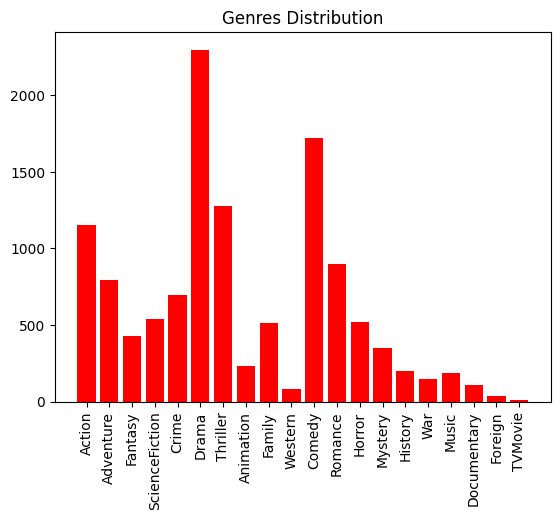

In [36]:
plt.bar(genre_counts.keys(),genre_counts.values(),color='red')
plt.xticks(rotation=90)
plt.title('Genres Distribution')
plt.show()

We can see that Drama genres are more popular among users.

In [37]:
all_cast=list(itertools.chain.from_iterable(movies.cast))
cast_counts=Counter(all_cast)
print(cast_counts.most_common(10))

[('RobertDeNiro', 54), ('SamuelL.Jackson', 44), ('BruceWillis', 39), ('MattDamon', 36), ('NicolasCage', 35), ('MorganFreeman', 35), ('JohnnyDepp', 32), ('BradPitt', 32), ('MarkWahlberg', 31), ('OwenWilson', 31)]


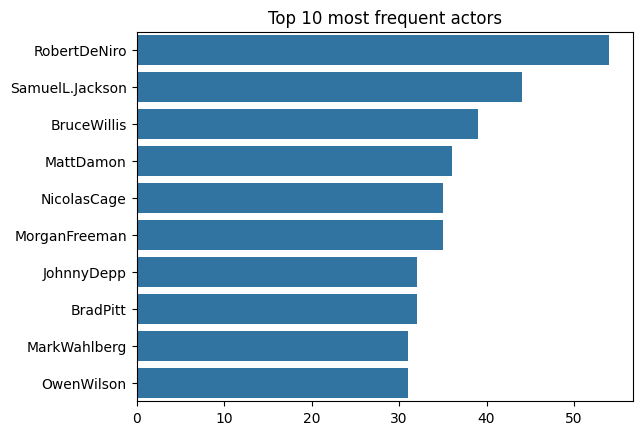

In [38]:
top_ten_actors=cast_counts.most_common(10)
names=[cast[0] for cast in top_ten_actors]
counts=[cast[1] for cast in top_ten_actors]

sns.barplot(x=counts,y=names)
plt.title('Top 10 most frequent actors')
plt.show()

We can see that Robert De Niro has appeared in more than 50 plus movies.

In [39]:
from wordcloud import WordCloud

In [40]:
all_overviews= ' '.join([' '.join(overview) for overview in movies['overview']])

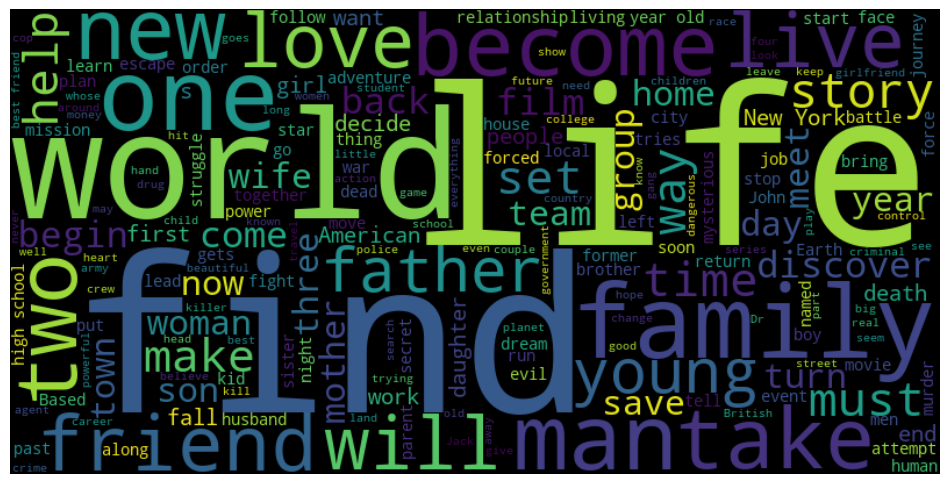

In [41]:
wordcloud = WordCloud(width=800, height=400).generate(all_overviews)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Here, we can visulalize that the most frequent words in overview are find,family,world and life.

In [42]:
movies['tags']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']

In [43]:
new_movies=movies[['id','title','tags']]

In [44]:
new_movies.tags=new_movies.tags.apply(lambda x:" ".join(x)) #Converting the list tag to strings

C:\Users\khadk\AppData\Local\Temp\ipykernel_14736\258781245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies.tags=new_movies.tags.apply(lambda x:" ".join(x)) #Converting the list tag to strings


In [45]:
new_movies.tags=new_movies.tags.apply(lambda x:x.lower()) #Lowercasing all the letters in the tags

C:\Users\khadk\AppData\Local\Temp\ipykernel_14736\2938155806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies.tags=new_movies.tags.apply(lambda x:x.lower()) #Lowercasing all the letters in the tags


In [46]:
new_movies.sample(3)

,id,title,tags
4029,157386,The Spectacular Now,a hard-partying high school senior's philosoph...
1949,49953,A Turtle's Tale: Sammy's Adventures,a sea turtle who was hatched in 1959 spends th...
1803,16784,Welcome to Mooseport,a us president (gene hackman) who has retired ...


#Vectorization

In [47]:
from nltk.stem import SnowballStemmer
snow_ball=SnowballStemmer('english')

In [48]:
#Stemming the root words using snowball stemmer
def stem(text):
    new_text=[]
    for word in text.split():
        new_text.append(snow_ball.stem(word))

    return " ".join(new_text)

In [49]:
new_movies['tags']=new_movies['tags'].apply(stem)

C:\Users\khadk\AppData\Local\Temp\ipykernel_14736\2598606076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags']=new_movies['tags'].apply(stem)


In [50]:
new_movies.head(1)

,id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."


#Text Vectorization:

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [52]:
#Extracting 5000 most common words for vetorization:
vectors=cv.fit_transform(new_movies['tags']).toarray()

In [53]:
vectors.shape

(4806, 5000)

In [54]:
features_name=cv.get_feature_names_out()

In [55]:
print(features_name)

['000' '007' '10' ... 'zone' 'zoo' 'zooeydeschanel']


In [56]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vectors)

In [57]:
cosine_similarity(vectors).shape

(4806, 4806)

In [58]:
similarity[2]

array([0.08471737, 0.05802589, 1.        , ..., 0.0246183 , 0.        ,
       0.        ])

In [74]:
def recommend(movie):
    #Find the index of the given movie:
    movies_index=new_movies[new_movies.title==movie].index[0]
    #Find the similarity array of the particular movie
    distance=similarity[movies_index]
    movies_list=sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[1:6]

    for i in movies_list:
        print(new_movies.iloc[i[0]].title)

In [75]:
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Battle: Los Angeles
